<a href="https://colab.research.google.com/github/Amoghakrao/Netflix-movies-and-tv-shows-clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING_AMOGHA_K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# **IMPORTING LIBRARIES AND DATA**

In [267]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [268]:
#LET'S MOUNT THE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [269]:
#LET'S LOAD THE DATA
Netflix_dataset=pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING - AMOGHA K/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

# **DATA PREPARATION**

In [270]:
#LET'S SEE  THE FIRST FIVE ROWS OF THE DATASET 
Netflix_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [271]:
#LET'S SEE  THE LAST FIVE ROWS OF THE DATASET 
Netflix_dataset.tail()
     

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [272]:
#CHECK THE TOTAL ROWS AND COLUMNS IN THE DATASET.
print('No. of rows :',Netflix_dataset.shape[0])
print('No. of Columns :',Netflix_dataset.shape[1])

No. of rows : 7787
No. of Columns : 12


In [273]:
#THE INFO() METHOD PRINTS INFORMATION ABOUT THE DATA.
Netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


* **Our data includes only one numerical type of data and the rest is all categorical data.**
* **Our data has 7877 rows and 12 columns.**

In [274]:
# CHECKING FOR COLUMNS
Netflix_dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [275]:
#CHECKING THE NULL VALUES IN OUR DATA
Netflix_dataset.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

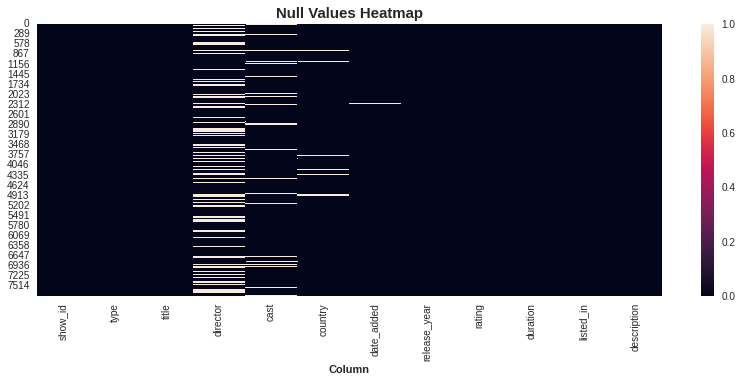

In [276]:
#USING A HEAT-MAP TO SHOW NULL VALUES COUNT
plt.figure(figsize=(14, 5))
sns.heatmap(Netflix_dataset.isnull())
plt.title('Null Values Heatmap',fontweight="bold",size=15)
plt.xlabel('Column',fontweight="bold")
plt.show()

In [277]:
#CHECKING THE PERCENTAGE OF COLUMNS WITH NULL VALUES 
for col in Netflix_dataset.columns:
  null_rate = Netflix_dataset[col].isnull().sum() / len(Netflix_dataset) * 100
  if null_rate > 0:
    print(f'Percentage of null values in {col} : {null_rate}%')

Percentage of null values in director : 30.679337357133683%
Percentage of null values in cast : 9.220495697958135%
Percentage of null values in country : 6.51085141903172%
Percentage of null values in date_added : 0.1284191601386927%
Percentage of null values in rating : 0.08989341209708489%


In [278]:
#LET'S CHECK FOR DUPLICATED ENTRIES.
Netflix_dataset.duplicated().sum()

0

* **There is no duplicate value in our data**



In [279]:
#LET'S CHECK THE STATISTICAL INFORMATION OF DATA
Netflix_dataset.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [280]:
# TOTAL NULL VALUES
Netflix_dataset.isnull().sum().sum()

3631

* **There are 3631 null values in the dataset, 2389 null values in the director column, 718 null values in the cast column, 507 null values in the country column, 10 in date_added, and 7 in rating. so we need to handle the null values.**

In [281]:
#TREATMENT OF NULL VALUES
Netflix_dataset['director'].fillna('No Director', inplace=True)
Netflix_dataset['cast'].fillna('No Cast', inplace=True)
Netflix_dataset['country'].fillna('Country Unavailable', inplace=True)


* **For the Director column, we filled in null values as 'No director', and for the Cast column, we filled in 'No cast' and country as 'country unavailabile'.**

In [282]:
#AFTER TREATMENT OF NULL VALUES
Netflix_dataset.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           7
duration         0
listed_in        0
description      0
dtype: int64

In [283]:
#REMOVING THE DTAE_ADDEED AND RATING COLUMN
Netflix_dataset.dropna(subset=['date_added','rating'],inplace=True)

*  **The other two columns, "date_added" and "rating," contain an insignificant portion of the data, so we can  drop them from the dataset.**

In [284]:
#CHECKING  THE SHAPE OF OUR DATA AFTER NULL VALUE TREATMENT
Netflix_dataset.shape

(7770, 12)

* **We have imported libraries and loaded the dataset; we had null values in our dataset and we have treated that, and now it is ready for data analysis.**

# **Exploratory Data Analysis**

**SPLITTING DATASET**

* **For EDA, we can divide data into movies and TV shows.**

**NETFLIX MOVIES**

In [285]:
#CREATING MOVIES DATAFRAME
netflix_movies = Netflix_dataset[Netflix_dataset['type']=='Movie'].copy()
netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


**NETFLIX TV SHOWS**

In [286]:
##CREATING TV SHOW DATAFRAME
netflix_shows = Netflix_dataset[Netflix_dataset['type']=='TV Show'].copy()
netflix_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,No Director,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,No Cast,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,No Director,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",Country Unavailable,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."


**Let’s create an EDA through this data with charts and visuals to gain some insights.**

**MOVIES VS TV SHOWS**

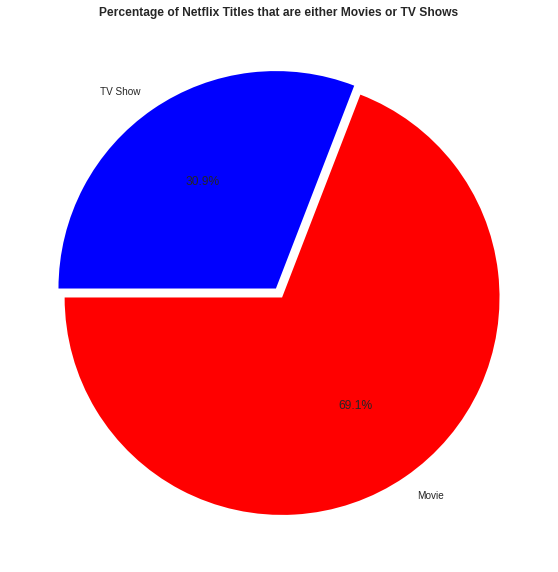

In [287]:
#PLOTING PIE CHART FOR MOVIES V/S SHOWS
plt.figure(figsize=(16,10))
plt.title('Percentage of Netflix Titles that are either Movies or TV Shows',fontweight ='bold', size = 12)
plt.pie(Netflix_dataset.type.value_counts(),explode=(0.025,0.025), labels=Netflix_dataset.type.value_counts().index, colors=['red','blue'],autopct='%1.1f%%', startangle=180)
plt.show()

* **It's evident that there are more movies on Netflix than TV shows.**
* **Netflix has 5377 movies, which is more than double the quantity of TV shows. There are about 69.1% movies and 30.9% TV shows on Netflix.**
* **There are more than twice as many movies uploaded to Netflix as there are TV shows.This does not imply that movies are more indulgent than TV shows. Because TV shows may have several seasons, which consist of a number of episodes, TV shows have a much longer run time than movies.**

**RELEASE YEAR AND RELEASE MONTHS WITH CONTENTS AVAILABLE**

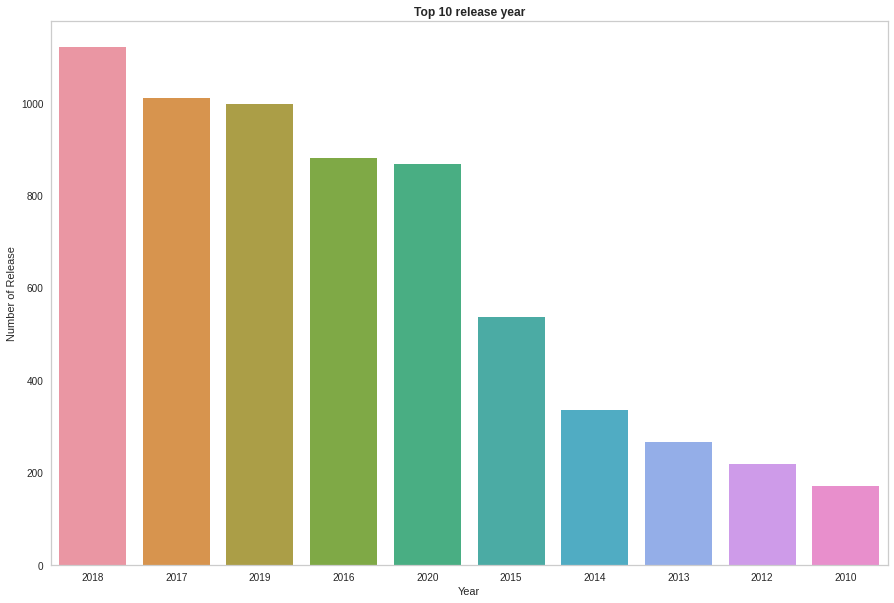

In [288]:
#PLOTING THE COUNTPLOT OF YEAR
plt.figure(figsize=(15,10))
g = sns.countplot(x = Netflix_dataset['release_year'], order=Netflix_dataset['release_year'].value_counts().index[:10])
plt.title('Top 10 release year',fontweight ='bold', size = 12)
plt.xlabel('Year')
plt.ylabel('Number of Release')
plt.grid(False)
plt.show()

* **Netflix produced the most content in 2018, and content has declined since then due to the COVID effect.**

In [289]:
#ADDING COLUMNS OF MONTH AND YEAR OF ADDITION
Netflix_dataset['Month'] = pd.DatetimeIndex(Netflix_dataset['date_added']).month
Netflix_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1


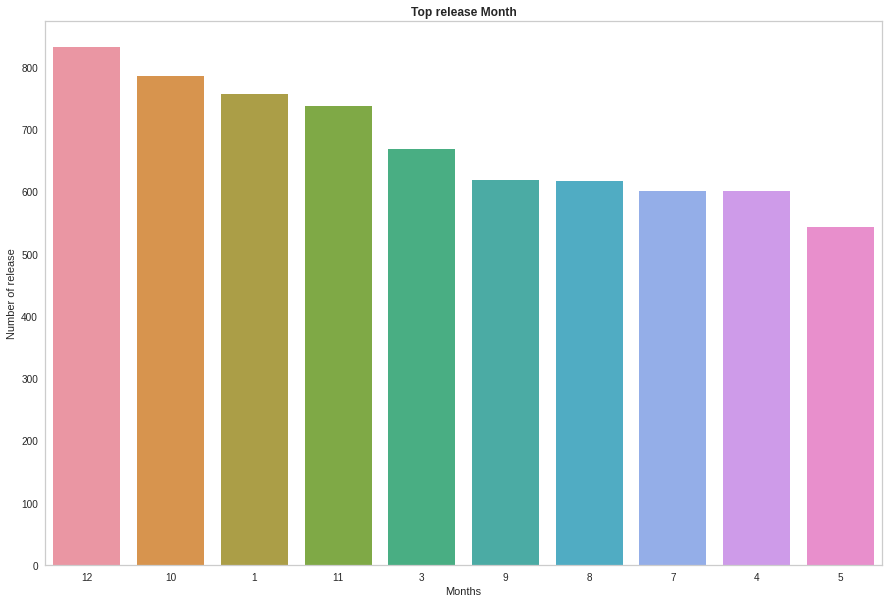

In [290]:
#PLOTTING THE COUNTPLOT OF RELEASE MONTH
plt.figure(figsize=(15,10))
g = sns.countplot(x = Netflix_dataset['Month'], order=Netflix_dataset['Month'].value_counts().index[:10])
plt.title('Top release Month',fontweight ='bold', size = 12)
plt.xlabel('Months')
plt.ylabel('Number of release')
plt.grid(False)
plt.show()

* **Most of the holidays came in December and January in the US and Europe. Most of the holidays came to India in October month.So releasing a movie or TV show between October and January is the best way to earn a lot of profit as the whole family will be spending time with each other and watching shows.**
* **The best 4 months to release content are October, November, December, and January.**

**MOVIES AND TV SHOWS RELESED AS PER MONTH**

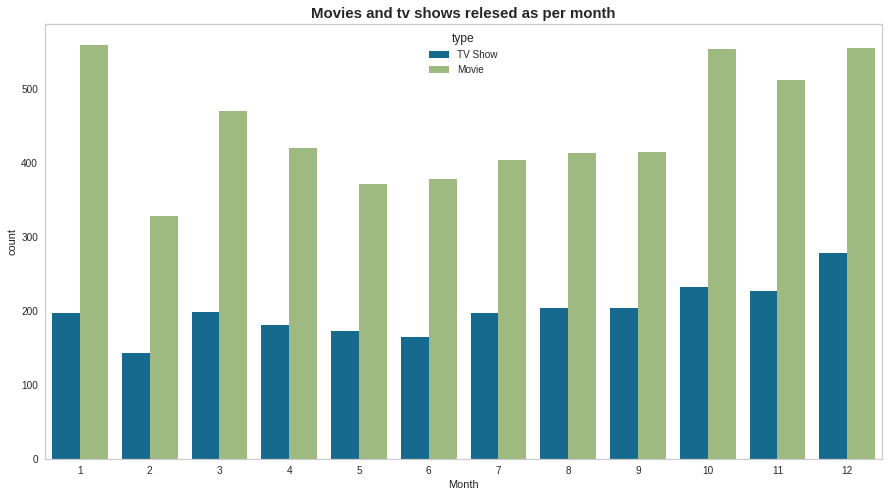

In [291]:
#PLOTING COUNTPLOT OF MOVIES AND TV SHOW AS PER MONTH
fig, ax = plt.subplots(figsize=(15,8))

sns.countplot(x='Month', hue='type',lw=5, data=Netflix_dataset, ax=ax)
plt.title('Movies and tv shows relesed as per month',fontweight ='bold', size = 15)
plt.grid(False)
plt.show()

* **According to the above graph, movie releases are higher than TV show releases per month.**

**TOP CONTRIBUTING COUNTRIES ON NETFLIX**

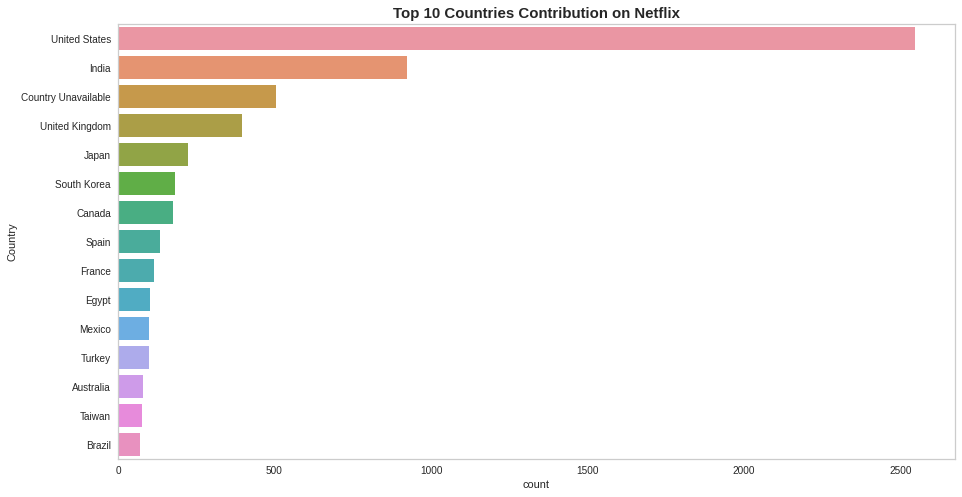

In [292]:
#PLOTING CONTRIES CONTRIBUTION ON NETFLIX
plt.figure(figsize=(15,8))
g = sns.countplot(y = Netflix_dataset['country'], order=Netflix_dataset['country'].value_counts().index[:15])
plt.title('Top 10 Countries Contribution on Netflix',fontweight ='bold', size = 15)
plt.ylabel('Country')
plt.grid(False)
plt.show()

* **From the above bar graph, we can see the top 15 countries that contribute the most to Netflix. The United States produces the most content in terms of quantity.**

**TOP 10 DIRECTORS ON NETFLIX**

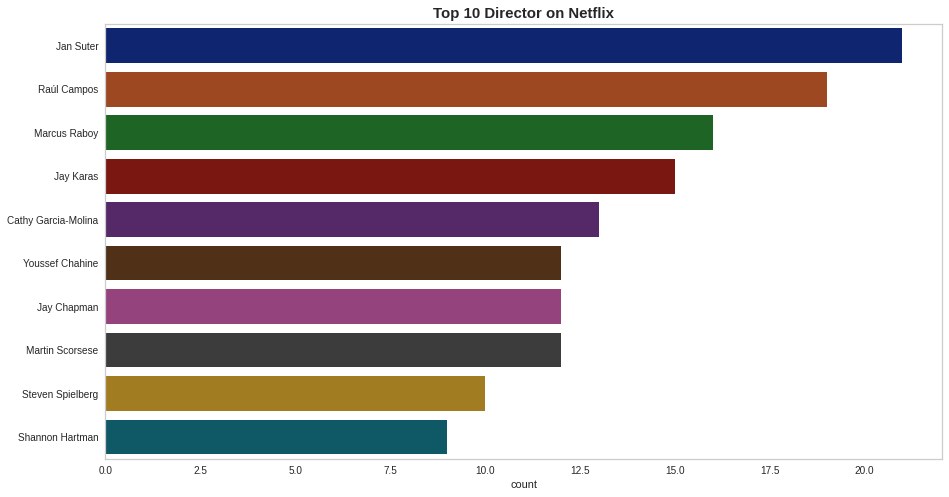

In [293]:
filtered_directors = Netflix_dataset[Netflix_dataset.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(15,8))
plt.title('Top 10 Director on Netflix',fontweight ='bold', size = 15)
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='dark')
plt.grid(False)
plt.show()

* **The most popular director on Netflix, with the most titles, is Jan Suter, and next is Raul Compos.**

**GENRES ON NETFLIX**

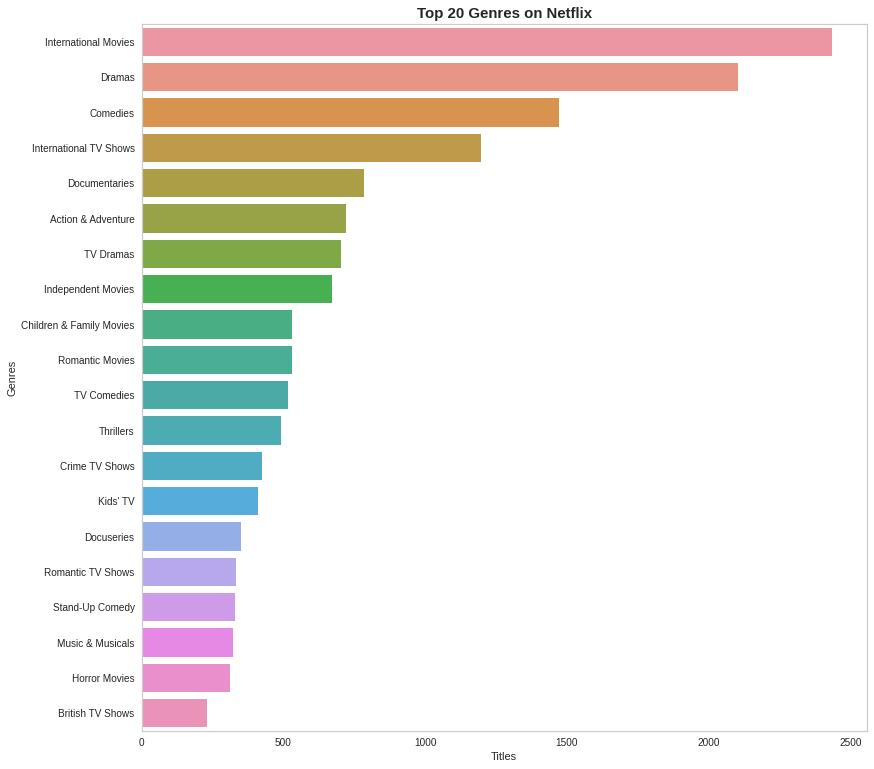

In [294]:
#TOP 20 GENRES ON NETFLIX
filtered_genres = Netflix_dataset.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(13,13))
g = sns.countplot(y = filtered_genres,order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix',fontweight ='bold', size = 15)
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.grid(False)
plt.show()

* **From the graph, we know that international movies take the first place, followed by dramas and comedies.**

**RATINGS FOR MOVIES & TV SHOWS**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


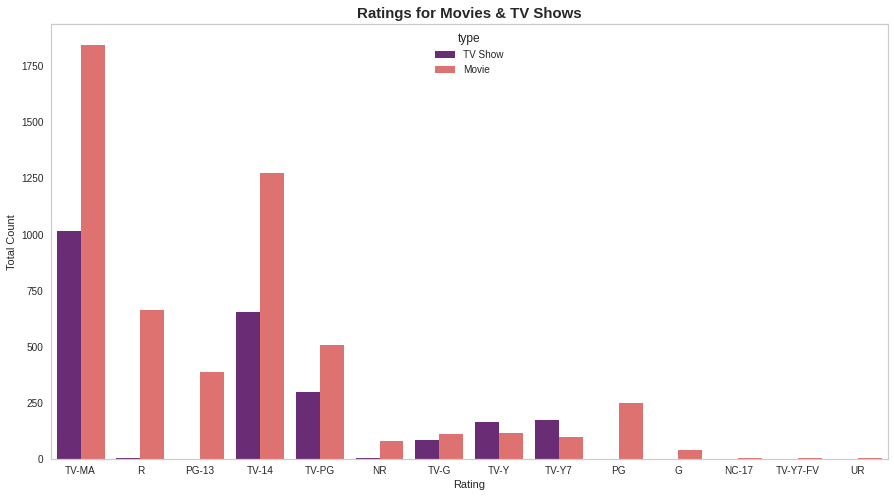

In [295]:
#RATINGS FOR MOVIES & TV SHOWS
plt.figure(figsize=(15,8))
g = sns.countplot(Netflix_dataset.rating, hue=Netflix_dataset.type, palette="magma");
plt.title("Ratings for Movies & TV Shows",fontweight ='bold', size = 15)
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.grid(False)
plt.show()

* **The largest number of TV shows have a "TV-MA" rating. "TV-MA" is a rating assigned by the TV Parental Guidelines to a television programme designed for mature audiences only.**

**TOP ACTORS IN MOVIE SAND TV SHOWS ON NETFLIX**

**TOP ACTORS IN TV SHOWS**

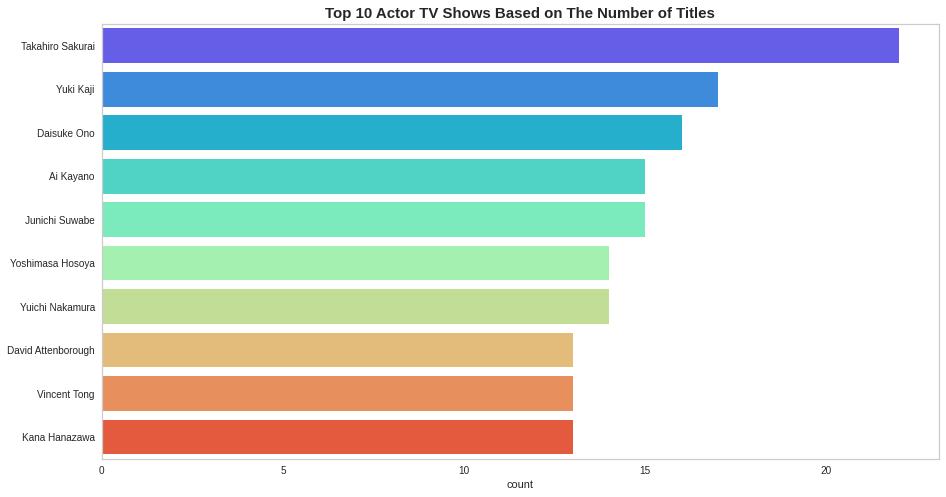

In [296]:
#TOP ACTORS IN TV SHOW USING COUNTPLOT
filtered_cast_shows = netflix_shows[netflix_shows.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(15,8))
plt.title('Top 10 Actor TV Shows Based on The Number of Titles',fontweight ='bold', size = 15)
sns.countplot(y = filtered_cast_shows, order=filtered_cast_shows.value_counts().index[:10], palette='rainbow')
plt.grid(False)
plt.show()

* **Based on the number of titles, Takahiro Sakurai is the top actor on Netflix TV shows.**

**TOP ACTORS IN MOVIES**

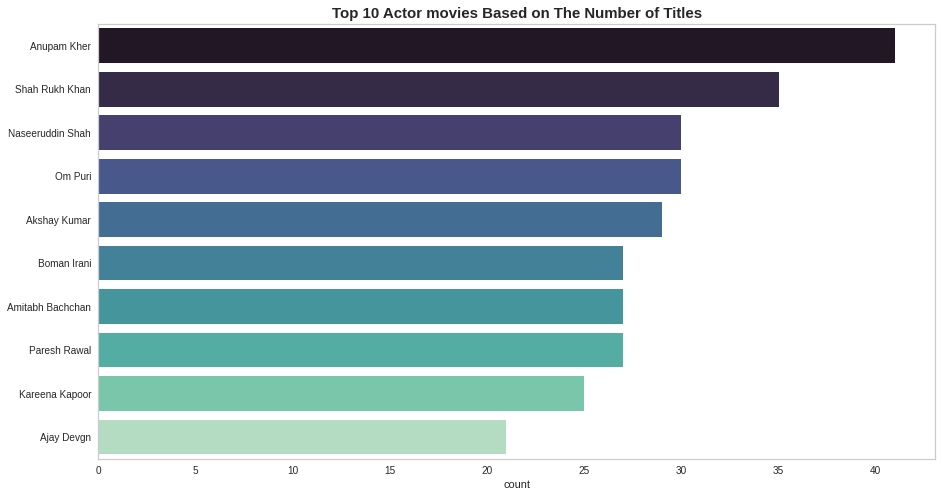

In [297]:
#TOP ACTORS IN MOVIES USING COUNTPLOT
filtered_cast_movies = netflix_movies[netflix_movies.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(15,8))
plt.title('Top 10 Actor movies Based on The Number of Titles',fontweight ='bold', size = 15)
sns.countplot(y = filtered_cast_movies, order=filtered_cast_movies.value_counts().index[:10], palette='mako')
plt.grid(False)
plt.show()

* **The top actor on Netflix Movies, based on the number of titles, is Anupam Kher.**

**COUNTRIES WITH CONTENTS AVAILABLE**

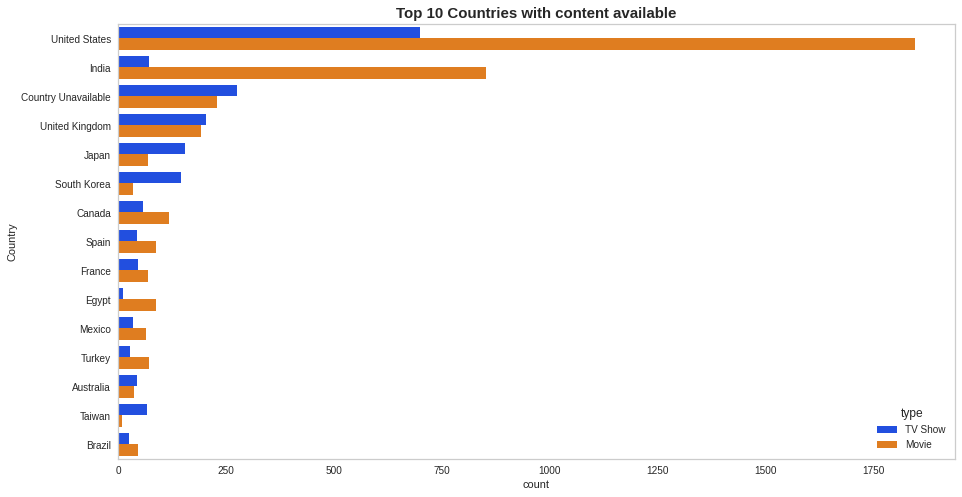

In [298]:
#TOP COUNTIRS WTH CONTENTS
filtered_genres = Netflix_dataset.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(15,8))
g = sns.countplot(y = Netflix_dataset['country'], hue=Netflix_dataset['type'],order=Netflix_dataset['country'].value_counts().index[:15],palette='bright')
plt.title('Top 10 Countries with content available',fontweight ='bold', size = 15)
plt.ylabel('Country')
plt.grid(False)
plt.show()

* **The United States is a leading producer of both types of content; this makes sense since Netflix is a US company.**
* **The majority of Netflix content available in India, Canada, Spain, France, Egypt, and Turkey consists of movies. The production of movies and television shows in the United Kingdom is about equal.**
* **South Korea, on the other hand, has a higher frequency of television shows, which explains the current KDrama culture.**

**DISTRIBUTION OF DURATION OF MOVIES**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


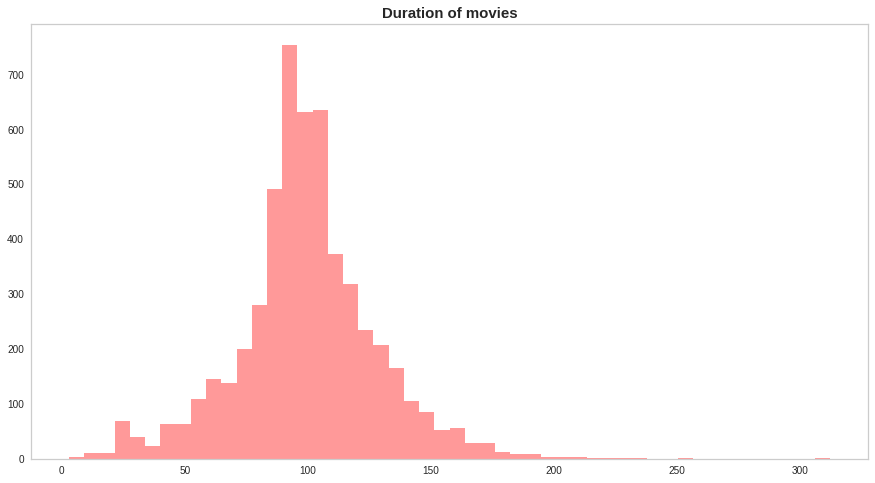

In [299]:
#CHECKING THE MOVIE DURATIONS
plt.figure(figsize=(15,8))
#REGULAR EXPRESSION PATTERN \D IS A REGEX PATTERN FOR A DIGIT, AND + IS A REGEX PATTERN FOR AT LEAST
sns.distplot(netflix_movies['duration'].str.extract('(\d+)'),kde=False, color=['red'])
plt.title('Duration of movies',fontweight="bold", size=15)
plt.grid(False)
plt.show()

* **The majority of the Movies run between 90 and 110 minutes.**

**NUMBER OF SEASONS OF TV SHOWS**

<function matplotlib.pyplot.show(*args, **kw)>

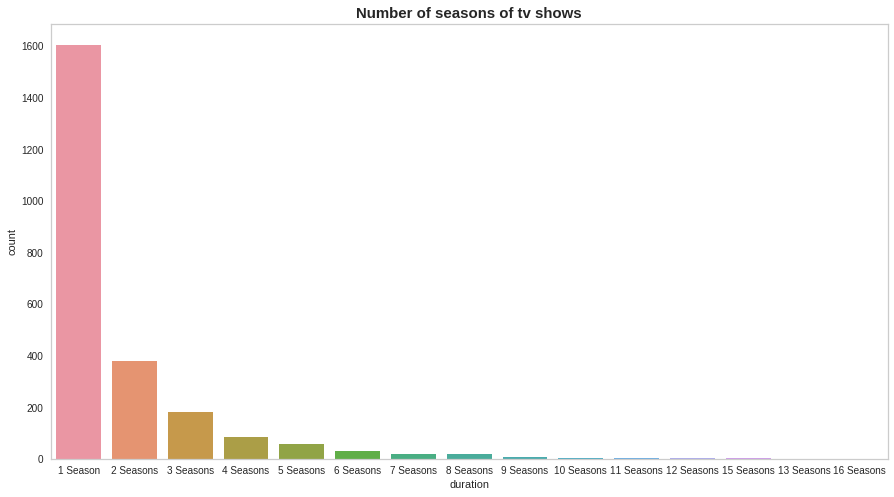

In [300]:
#NUMBER OF SEASONS OF TV SHOWS
plt.figure(figsize=(15,8))
plt.title("Number of seasons of tv shows",fontweight='bold', size=15)
sns.countplot(x=netflix_shows['duration'],data=netflix_shows,order = netflix_shows['duration'].value_counts().index)
plt.grid(False)
plt.show

* **It has been noted that 1608 television shows only have one season. There are only a few television shows that have the longest running times.**

**NETFLIX CONTENT IS AVAILABLE FOR DIFFERENT AGE GROUPS IN DIFFERENT COUNTRIES.**

In [301]:
#ASSIGNING THE RATINGS INTO GROUPED CATEGORIES
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
Netflix_dataset['target_ages'] = Netflix_dataset['rating'].replace(ratings)

**CORRELATION HEATMAP**

In [302]:
#PREPARING DATA FOR THE HEATMAP
Netflix_dataset['target_ages'] = pd.Categorical(Netflix_dataset['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [303]:
#ASSIGNING  WITH COUNTRIES 
Netflix_dataset['count'] = 1
data = Netflix_dataset.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']

Netflix_dataset_heatmap = Netflix_dataset.loc[Netflix_dataset['country'].isin(data)]
Netflix_dataset_heatmap = pd.crosstab(Netflix_dataset_heatmap['country'], Netflix_dataset_heatmap['target_ages'],normalize = "index").T
Netflix_dataset_heatmap

country,Canada,Country Unavailable,Egypt,France,India,Japan,South Korea,Spain,United Kingdom,United States
target_ages,,,,,,,,,,
Kids,0.180791,0.170297,0.000000,0.095652,0.016251,0.008929,0.027322,0.022388,0.093434,0.073449
Older Kids,0.225989,0.235644,0.039604,0.060870,0.160347,0.272321,0.120219,0.044776,0.204545,0.187353
Teens,0.146893,0.275248,0.683168,0.165217,0.567714,0.352679,0.382514,0.097015,0.189394,0.236842
Adults,0.446328,0.318812,0.277228,0.678261,0.255688,0.366071,0.469945,0.835821,0.512626,0.502357


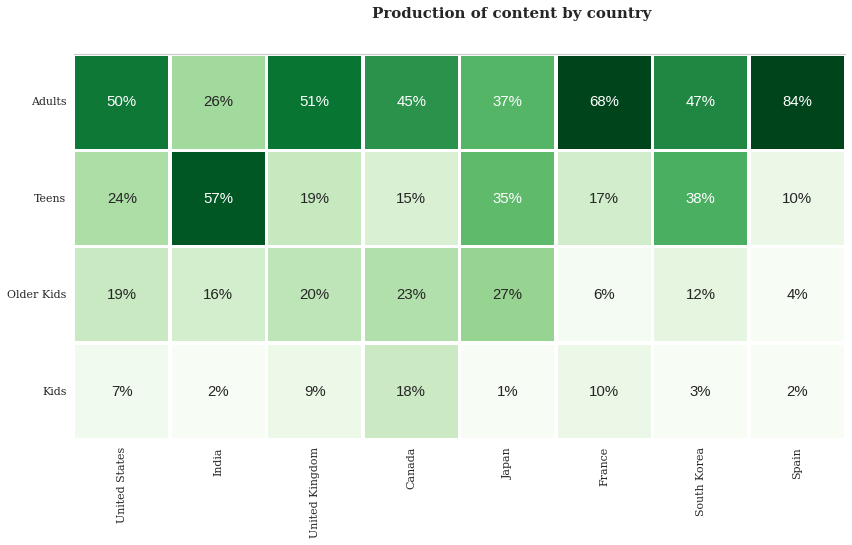

In [304]:
# PLOTTING THE HEATMAP
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(Netflix_dataset_heatmap.loc[age_order,country_order2],cmap="Greens",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='2.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":15})

ax.spines['top'].set_visible(True)

fig.text(.76,.765, 'Production of content by country', fontweight='bold', fontfamily='serif', fontsize=15,ha='right')   

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

* **According to the correlation graph, adults prefer to watch movies and TV shows in Spain, France, the United Kingdom, and the United States.**
* **In India, 57 percent of teens watch movies and TV shows, while only 26 percent of adults do that means in India Netflix need to more concentrate to Teens.**
* **Spain is producing the most adult content on Netflix, at 84%.**

**ANALYSIS WITH COUNTRY INDIA**

In [305]:
#CHECKING THE PANDAS VERSION
import pandas
print(pandas.__version__)

1.3.5


In [306]:
pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [307]:
#GETTING DATA RELATED TO INDIA
grp = Netflix_dataset.groupby('country')
India=grp.get_group('India')

**TOP CONTENT RELEASE YEAR IN INDIA**

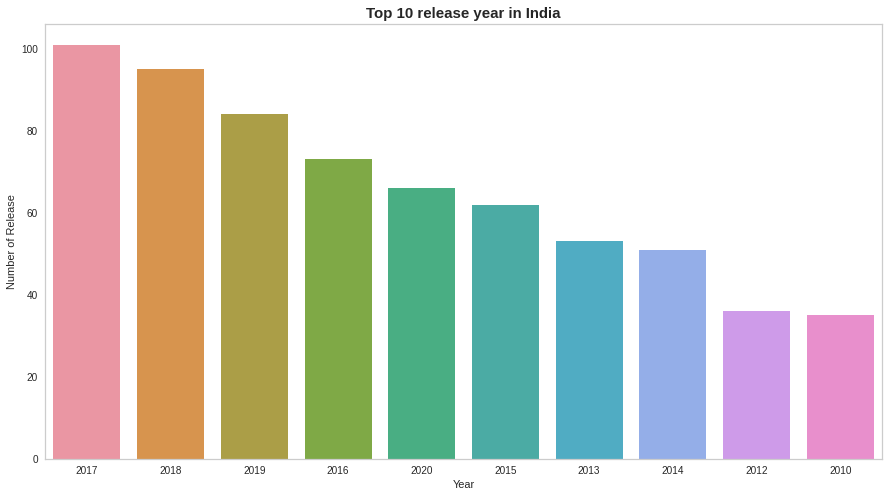

In [308]:
#PLOTING TOP CONTENT RELEASE YEAR IN INDIA
plt.figure(figsize=(15,8))
g = sns.countplot(x = India['release_year'], order=India['release_year'].value_counts().index[:10])
plt.title('Top 10 release year in India',fontweight='bold', size=15)
plt.xlabel('Year')
plt.ylabel('Number of Release')
plt.grid(False)
plt.show()

* **The most popular content released in 2017 according to India.**

**TOP RATINGS IN INDIA**

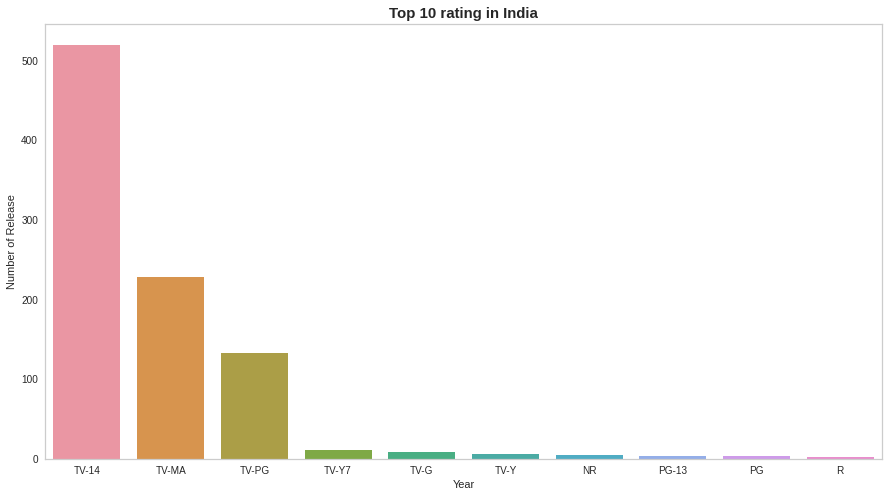

In [309]:
#PLOTING TOP RATINGS IN INDIA
plt.figure(figsize=(15,8))
g = sns.countplot(x = India['rating'], order=India['rating'].value_counts().index[:10])
plt.title('Top 10 rating in India',fontweight='bold', size=15)
plt.xlabel('Year')
plt.ylabel('Number of Release')
plt.grid(False)
plt.show()

* **Teenage content has the highest rating in India.**

**GENRES IN INDIA**

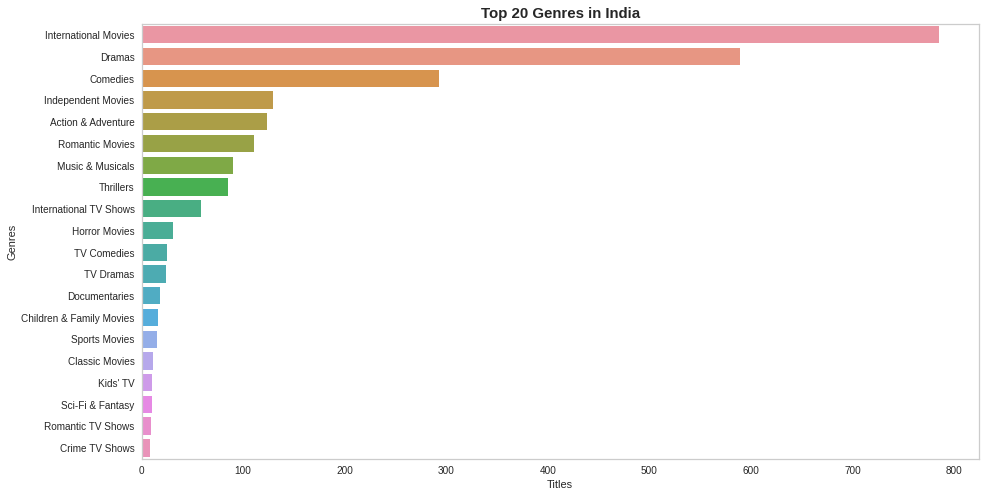

In [310]:
#PLOTING GENRE IN INDIA
filtered_genres1 = India.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(15,8))
g = sns.countplot(y = filtered_genres1,order=filtered_genres1.value_counts().index[:20])
plt.title('Top 20 Genres in India',fontweight='bold', size=15)
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.grid(False)
plt.show()

* **International content is in high demand in India.**

**COMPARISOIN RATINGS FOR MOVIES AND TV SHOWS IN INDIA**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


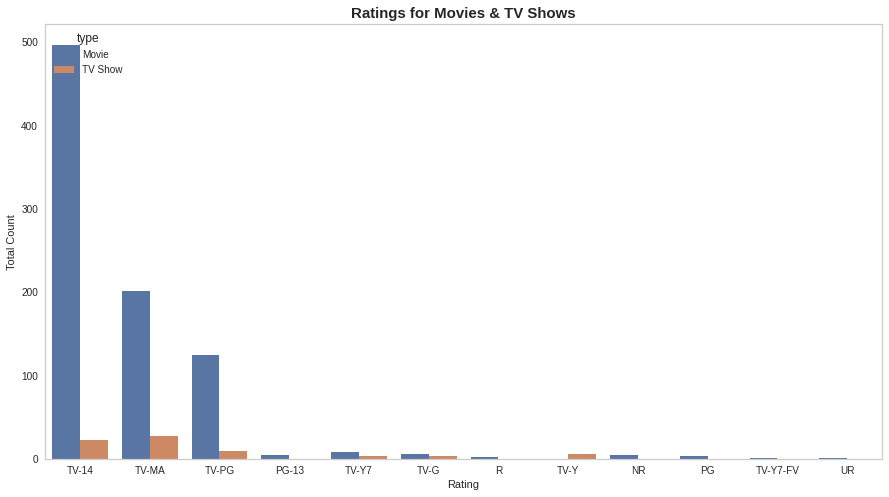

In [311]:
#COMPARISOIN RATINF FOR MOVIES AND SHOWS IN INDIA
plt.figure(figsize=(15,8))
g = sns.countplot(India.rating, hue=India.type, palette="deep");
plt.title("Ratings for Movies & TV Shows",fontweight='bold', size=15)
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.grid(False)
plt.show()

In [312]:
#CHECKING THE COLUMNS
Netflix_dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Month', 'target_ages', 'count'],
      dtype='object')

In [313]:
#CREATING A NEW DATAFRME FOR FURTHER ANALYSIS
new_Netflix_dataset = Netflix_dataset.drop(columns=['show_id','director', 'title', 'cast','duration', 'date_added', 'description'],axis=1)
new_Netflix_dataset

,type,country,release_year,rating,listed_in,Month,target_ages,count
0,TV Show,Brazil,2020,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",8,Adults,1
1,Movie,Mexico,2016,TV-MA,"Dramas, International Movies",12,Adults,1
2,Movie,Singapore,2011,R,"Horror Movies, International Movies",12,Adults,1
3,Movie,United States,2009,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...",11,Teens,1
4,Movie,United States,2008,PG-13,Dramas,1,Teens,1
...,...,...,...,...,...,...,...,...
7782,Movie,"Sweden, Czech Republic, United Kingdom, Denmar...",2005,TV-MA,"Dramas, International Movies",10,Adults,1
7783,Movie,India,2015,TV-14,"Dramas, International Movies, Music & Musicals",3,Teens,1
7784,Movie,Country Unavailable,2019,TV-MA,"Documentaries, International Movies, Music & M...",9,Adults,1
7785,TV Show,Australia,2019,TV-PG,"International TV Shows, Reality TV",10,Older Kids,1


**DATA ENCODING**

In [314]:
#IMPORTING LIBRARIES
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_Netflix_dataset["type"] = le.fit_transform(new_Netflix_dataset["type"])
new_Netflix_dataset["country"] = le.fit_transform(new_Netflix_dataset["country"])
new_Netflix_dataset["target_ages"] = le.fit_transform(new_Netflix_dataset["target_ages"])
new_Netflix_dataset['rating'] = le.fit_transform(new_Netflix_dataset['rating'])
new_Netflix_dataset['listed_in'] = le.fit_transform(new_Netflix_dataset['listed_in'])

**DATA STANDARIZATION**

In [315]:
#IMPORTING LIBRATRIES
import sklearn
from sklearn.preprocessing import StandardScaler

In [316]:
# TRANSFORM THE DATA USING STANDARDSCALER
X = pd.DataFrame(StandardScaler().fit_transform(new_Netflix_dataset),columns = new_Netflix_dataset.columns)

In [317]:
#CHECKING THE SHAPE
X.shape

(7770, 8)

In [318]:
#CHECKING THE TYPE
type(X)

pandas.core.frame.DataFrame

## **PRINCIPAL COMPONENT ANALYSIS**

**Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation**

In [319]:
#IMPORTING LIBRATRIES
from sklearn.decomposition import PCA

In [320]:
#FUNCTION TO UNDERSTAND THE VARIANCE FOR DIFFERENT N_COMPONENTS
def pca_variance(n_components):
  pca= PCA(n_components= n_components)
  pca.fit(X)
  print(sum(pca.explained_variance_ratio_))

In [321]:
pca_variance(7)

1.0000000000000002


In [322]:
pca = PCA(n_components=7)
pca.fit(X)

PCA(n_components=7)

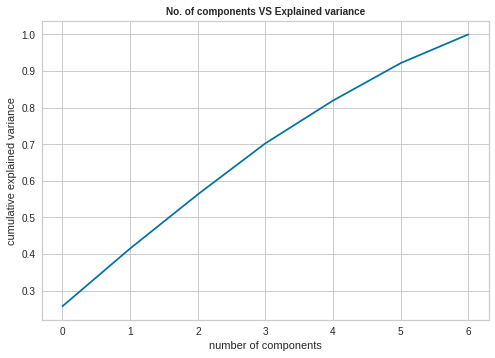

In [323]:
#PLOTING COMPONENTS VS EXPLAINED VARIENCE
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('No. of components VS Explained variance',fontweight='bold', size=10)
plt.show()

* **Typically, we want the explained variance to be between 95 and 99%. In this case, 7 principal components are required to explain 99% (most approximate is 100%) of the variance.**

In [324]:
X_pca = pca.fit_transform(X)

In [325]:
X_pca.shape

(7770, 7)

**KMEANS CLUSTERING**

**K-means Clustering is a type of unsupervised learning that is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K.**

In [326]:
#IMPORTING LIBRATRIES
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [327]:
kmeans = KMeans( init="k-means++", n_clusters=8, max_iter=300,   random_state=0)

**K-ELBOW METHOD**

**The Elbow Method is one of the most popular methods to determine this optimal value of k.**

In [328]:
#IMPORTING LIBRATRIES
from yellowbrick.cluster import KElbowVisualizer

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fdb248dea00>,
                 estimator=KMeans(n_clusters=9, random_state=0), k=(2, 10),
                 locate_elbow=False, timings=False)

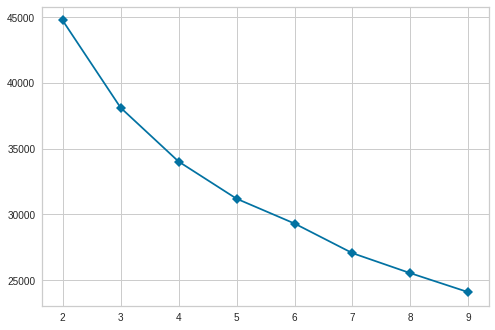

In [329]:
visualizer = KElbowVisualizer(kmeans, k=(2,10), metric= 'distortion', timings= False, locate_elbow= False)
visualizer.fit(X)

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fdb24893580>,
                 estimator=KMeans(n_clusters=9, random_state=0), k=(2, 10),
                 metric='silhouette', timings=False)

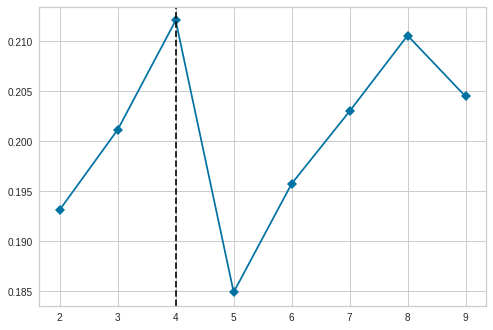

In [330]:
visualizer = KElbowVisualizer(kmeans, k=(2,10), metric='silhouette', timings=False, locate_elbow=True)
visualizer.fit(X)

**To determine the optimal number of clusters, we have to select the value of k at the "elbow," i.e., the point after which the distortion/inertia start decreasing in a linear fashion. Thus, for the given data, we conclude that the optimal number of clusters for the data is 4.**

**SILHOUETTE SCORE**

 **Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.**

In [331]:
#IMPORTING LIBRATRIES
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

In [332]:
from sklearn.metrics import silhouette_score, silhouette_samples

def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters)
      preds = km.fit_predict(X)
      centers = km.cluster_centers_

      score = silhouette_score(X, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(X)
       # FIT THE TRAINING DATA TO THE VISUALIZER
      visualizer.poof()
       # DRAW/SHOW/POOF THE DATA

For n_clusters = 2, silhouette score is 0.19315459646374744


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


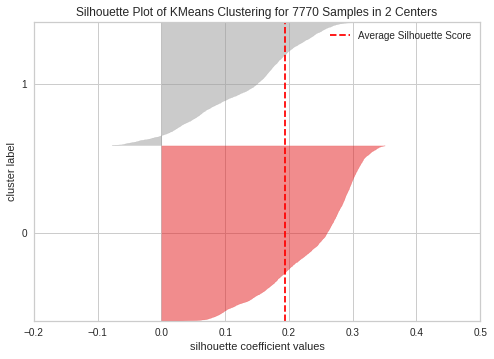

For n_clusters = 3, silhouette score is 0.20107163812609838


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


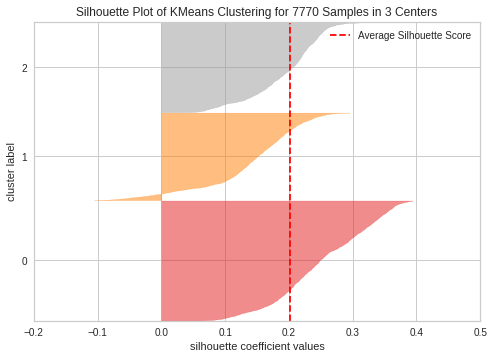

For n_clusters = 4, silhouette score is 0.21190367478735816


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


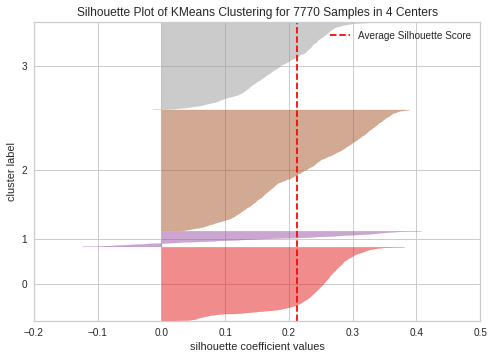

For n_clusters = 5, silhouette score is 0.18480813970067428


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


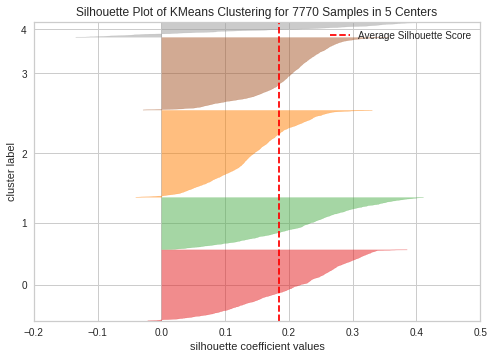

For n_clusters = 6, silhouette score is 0.2058433398854848


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


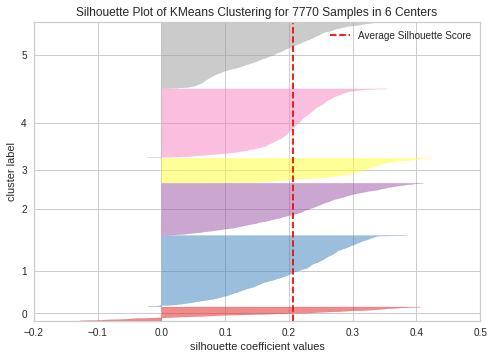

For n_clusters = 7, silhouette score is 0.19217114442439523


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


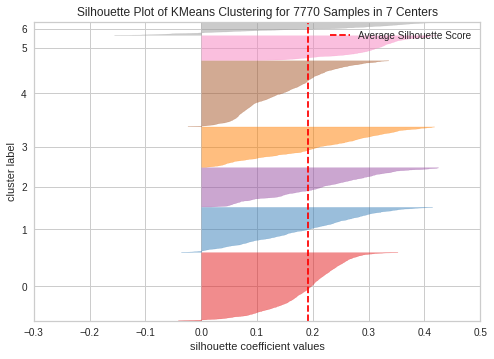

In [333]:
silhouette_score_analysis(8)

**Here is the silhouette analysis done on the above plots to select an optimal value for n_clusters.The value of 4 for n_clusters looks to be the optimal one. The silhouette score for each cluster is above average.**

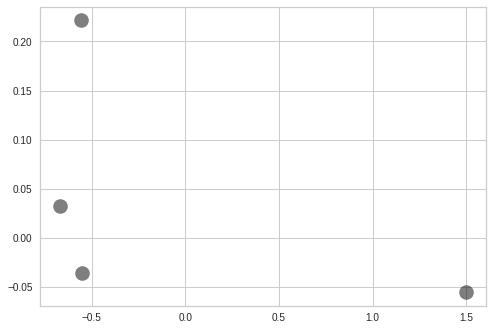

In [334]:
# LOOKS LIKE WE CAN GO WITH 4 CLUSTERS.

kmeans= KMeans(n_clusters=4, init= 'k-means++',max_iter=300, n_init=1)

kmeans.fit(X)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [335]:
labels = kmeans.fit_predict(X)

In [336]:
# SILHOUETTE SCORE OF CLUSTERS
print("Silhouette Coefficient: %0.3f"%silhouette_score(X, kmeans.labels_))

Silhouette Coefficient: 0.205


**K MEANS CLUSTERING**

In [337]:
# FITTING THE K MEANS ALGORITHM ON LOWER FEATURES
kmeans= KMeans(n_clusters=4, init= 'k-means++',max_iter=300, n_init=1)
kmeans.fit(X_pca)

KMeans(n_clusters=4, n_init=1)

In [338]:
# SILHOUETTE SCORE
print("Silhouette Coefficient:  %0.3f"%silhouette_score(X_pca, kmeans.labels_))

Silhouette Coefficient:  0.159


In [339]:
#PREDICT THE LABELS OF CLUSTERS.
label = kmeans.fit_predict(X_pca)

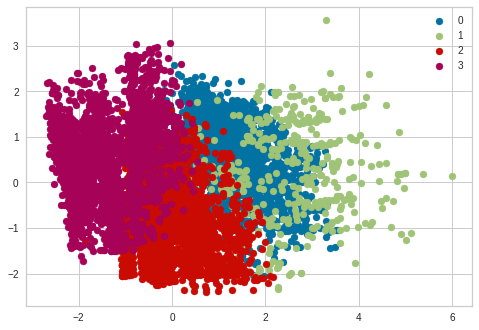

In [340]:
#GETTING UNIQUE LABELS
u_labels = np.unique(label)
#PLOTTING THE RESULTS:
for i in u_labels:
    plt.scatter(X_pca[label == i , 0] , X_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

## **HIRARCHICAL CLUSTERING**

**Hierarchical clustering is another unsupervised machine learning algorithm, which is used to group the unlabeled datasets into a cluster and also known as hierarchical cluster analysis or HCA.**

**In this algorithm, we develop the hierarchy of clusters in the form of a tree, and this tree-shaped structure is known as the dendrogram.**

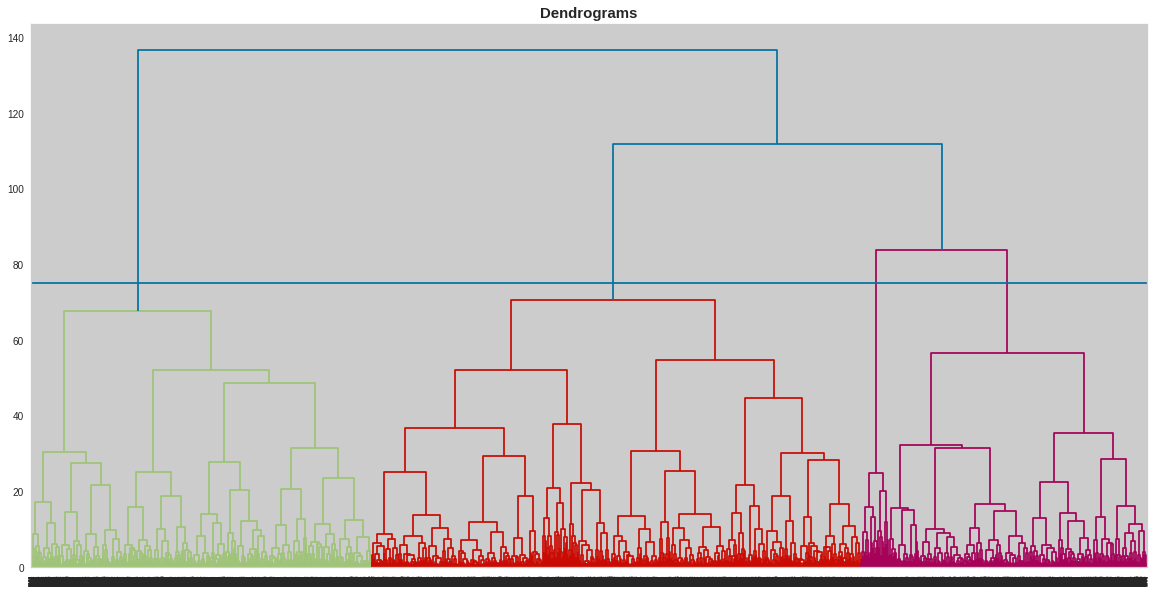

In [341]:
##IMPORTING LIBRATRIES
import scipy.cluster.hierarchy as shc
#PLOTING DENDOGRAM
plt.figure(figsize=(20,10))  
plt.title("Dendrograms",fontweight='bold', size=15)  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

plt.axhline(y=75)

**Assume we cut vertical lines with a horizontal line to obtain the number of clusters. Number of clusters = 5**

## **AGGLOMERATIVE CLUSTERING**

**The agglomerative hierarchical clustering algorithm is a popular example of HCA. To group the datasets into clusters, it follows the bottom-up approach. It means, this algorithm considers each dataset as a single cluster at the beginning, and then start combining the closest pair of clusters together. It does this until all the clusters are merged into a single cluster that contains all the datasets.**

In [342]:
##IMPORTING LIBRATRIES
from sklearn.cluster import AgglomerativeClustering
# FITTING HIERARCHICAL CLUSTERING TO THE MALL DATASET
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_pca)

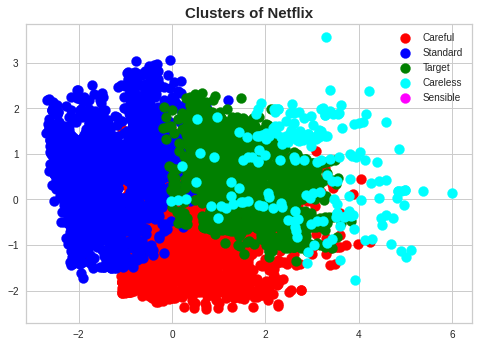

In [343]:
# VISUALIZING THE CLUSTERS (TWO DIMENSIONS ONLY)
plt.scatter(X_pca[y_hc == 0, 0], X_pca[y_hc == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X_pca[y_hc == 1, 0], X_pca[y_hc == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X_pca[y_hc == 2, 0], X_pca[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X_pca[y_hc == 3, 0], X_pca[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X_pca[y_hc == 4, 0], X_pca[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.title('Clusters of Netflix',fontweight='bold', size=15)
plt.legend()
plt.show()

## **CONCLUSION**

**We have done EDA and clustring , and we have drawn many interesting inferences from the Netflix title dataset; here’s a summary of a few of them:**

* **Movies are the most popular type of content on Netflix. It appears that Netflix has focused more attention on increasing movie content than TV shows. Movies have increased much more dramatically than TV shows.**
* **There are about 70% movies and 30% TV shows on Netflix.**
* **Most films were released in the years 2018, 2019, and 2020.**
* **The number of releases significantly increased after 2015 and dropped in 2021 because of COVID 19.**
* **The months of October, November, December, and January had the largest number of films and television series released.**
* **More of the content is released during the holiday season—October, November, December, and January.**
* **The United States has the highest number of content on Netflix by a huge margin followed by India.**
* **Raul Campos and Jan Sulter collectively have directed the most content on Netflix.**
* **Anupam Kher has acted in the highest number of films on Netflix. Drama is the most popular genre followed by comedy.**
* **The most popular genre on Netflix is international movies, followed by stand-up comedy and drama.**
* **The majority of the films run between 90 and 110 minutes.**
* **Highest number of TV shows consisting of a single season**
* **Using the correlation heatmap, we can see that in India, most of the teens watch Netflix**
* **TV-MA has the highest number of ratings for tv shows i,e adult ratings**
* **In India, teens mostly watched international movies.**
* **Principal Component analysis (PCA)reduced the number of componets as 7 with approximately 99% of variance.**
* **We used the elbow and silhouette score methods for K-means clustering to determine the number of k. Using both methods, we discovered that k = 4 is the best value for clustering.**
* **Using the hierarchical clustering method again, we find that k = 4 is the optimal value for clustering.**
